# Challenge
1. Perform basic signal processing methods (e.g., filters, transforms, etc.) on the provided EEG data from a seizure patient
1. Display visualizations of how these processes affected the data
1. Apply statistical measures to show how seizure and non-seizure data differentiate (e.g., range of data during seizure event vs range of data during non-seizure times)
1. Display visualizations of the statistical measures and how any of the above processes affected these measures

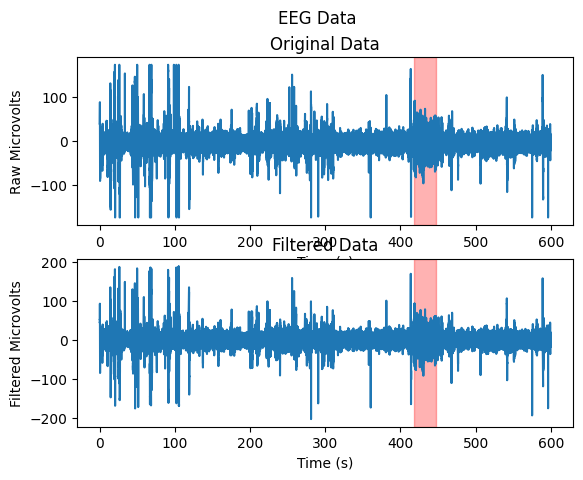

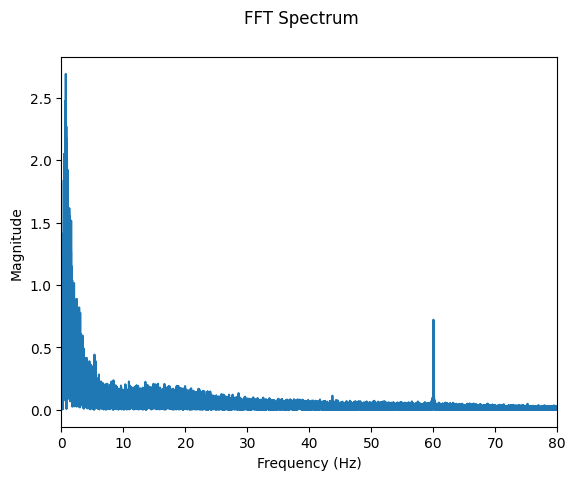

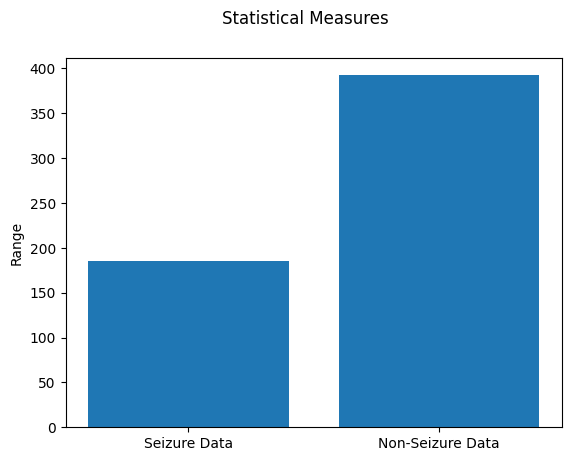

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft

# Define functions for signal processing and statistical measures
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def fft_transform(data, fs):
    n = len(data)
    yf = fft(data)
    xf = np.linspace(0.0, 1.0/(2.0/fs), n//2)
    yf = 2.0/n * np.abs(yf[0:n//2])
    return xf, yf

# Load data from csv file
data = pd.read_csv('data.csv', header=None)

# Define data properties
duration = 600 # Duration of data in seconds
fs = len(data[0]) / duration # Sampling rate in Hz
# print(fs)
seizure_start = int(418 * fs) # Start of seizure event in samples
# print(seizure_start)
# print(seizure_end)
seizure_end = int(447 * fs) # End of seizure event in samples

# Apply bandpass filter to data
filtered_data = bandpass_filter(data[0], 0.3, 92, fs)

# Plot original and filtered data
fig, axs = plt.subplots(2)
fig.suptitle('EEG Data')
axs[0].plot(np.arange(duration*fs)/fs, data[0])
axs[0].set_title('Original Data')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Raw Microvolts')
axs[1].plot(np.arange(duration*fs)/fs, filtered_data)
axs[1].set_title('Filtered Data')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Filtered Microvolts')

# Apply FFT transform to data
xf, yf = fft_transform(filtered_data, fs)

# Plot FFT spectrum
fig, ax = plt.subplots()
fig.suptitle('FFT Spectrum')
ax.plot(xf, yf)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_xlim([0, 80]) # Set y-axis range

# Compute statistical measures
seizure_data = filtered_data[seizure_start:seizure_end]
non_seizure_data = np.concatenate((filtered_data[:seizure_start], filtered_data[seizure_end:]))
seizure_range = np.max(seizure_data) - np.min(seizure_data)
non_seizure_range = np.max(non_seizure_data) - np.min(non_seizure_data)

# Plot statistical measures
fig, ax = plt.subplots()
fig.suptitle('Statistical Measures')
ax.bar(['Seizure Data', 'Non-Seizure Data'], [seizure_range, non_seizure_range])
ax.set_ylabel('Range')

# Highlight seizure event in data plots
for ax in axs:
    ax.axvspan(seizure_start/fs, seizure_end/fs, alpha=0.3, color='red')

plt.show()

The FFT data shows that a frequency of of 60 Hz is present. My research shows typical frequency of brain activity can range from 0.5-35 Hz [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6668003/], whereas the frequncy of brain activity during seizure are higher around 40 - 120 HZ [https://pubmed.ncbi.nlm.nih.gov/1517412/#:~:text=Seizures%20with%20electrodecremental%20patterns%20at,Hz%20portion%20of%20the%20spectrum]. This leads me to believe that the seizure that was recordded was 60 Hz. 